In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
import seaborn as sns
import os
import urllib.request

### Data PreProcessing

*Importing the libraries, dataset and splitting the dataset into training and test set, and analyzing the dataset*

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

file_name = "data.csv"

if not os.path.exists(file_name):
    # Fetch the data file from the UCI repository if it isn't present
    urllib.request.urlretrieve(url, file_name)
    print("Data file downloaded!")

else:
    print("Data file already present.")

Data file already present.


In [5]:
column_names = ['id_number', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
                'fractal_dimension_se', 'radius_worst', 'texture_worst',
                'perimeter_worst', 'area_worst', 'smoothness_worst',
                'compactness_worst', 'concavity_worst', 'concave_points_worst',
                'symmetry_worst', 'fractal_dimension_worst']

In [6]:
df = pd.read_csv('data.csv', names=column_names) #loading the data
df.head()

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_number                569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id_number,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


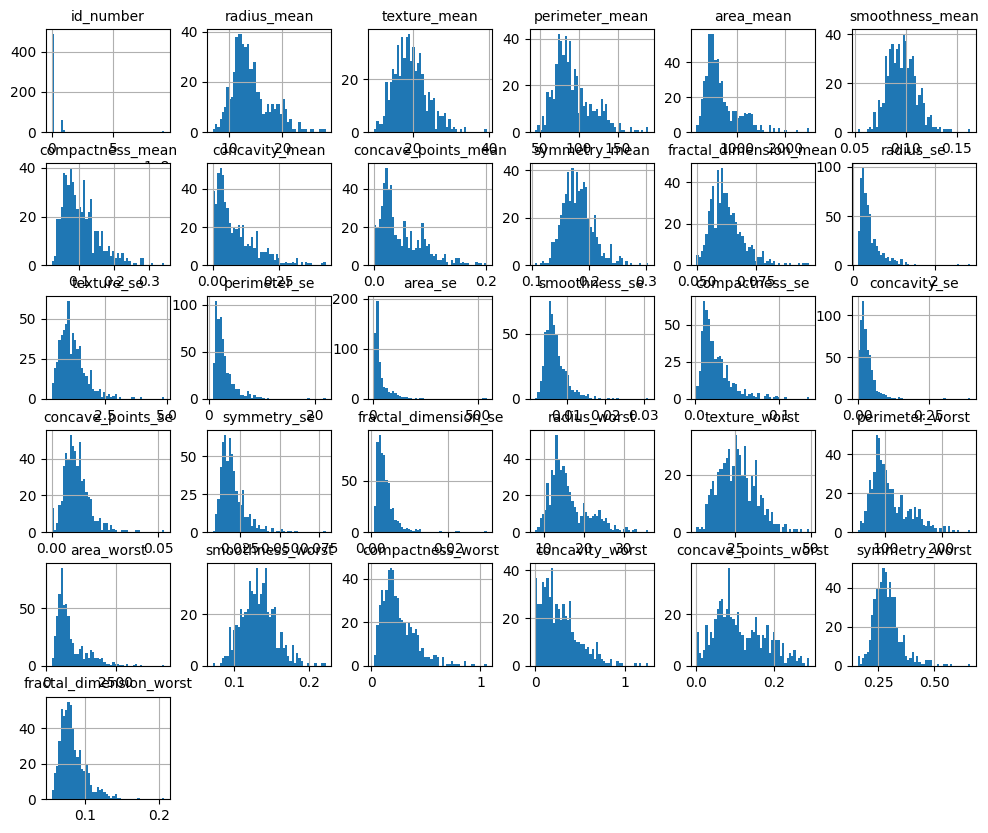

In [9]:
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 10))

plt.show() #The data is skewed to the right as per the following histograms as per expectance as all the data is positive


In [10]:
df.drop('id_number', axis=1, inplace=True) #remove unecessary values

In [11]:
df["diagnosis"].replace({"M": 1, "B": 0}, inplace=True) #Replace M, B for 1 and 0 respectively

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42) #split our data: 80% training, 20% testing

In [14]:
prediction_vars = prediction_vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']
#hold the list of all of the features we want to use *in this case all of them as this is my first ML project*

In [15]:
#Train Data
train_x = train[prediction_vars]
train_y = train['diagnosis']

#Test Data
test_x = test[prediction_vars]
test_y = test['diagnosis']


### Sigmoid Function:

$$p_{\theta}(z) = \frac{1}{1+e^{-\theta^Tz}} \tag{1}$$

If z is large, then $p(z)$ is close to 1, and if z is small, then $p(z)$ is close to 0. (Theta is our parameter vector)

In [25]:
# Logistic/Sigmoid Model's Algorithm σ(z) = 1/1+e^-z
def sigmoid(z):
    return np.clip(1 / (1 + np.exp(-z)), 1e-10, 1 - 1e-10) #We use the clip function to prevent flow related errors

In [26]:
sigmoid(train_x).head() #Check it out on our training data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
68,0.999880,1.000000,1.0,1.0,0.526625,0.535266,0.577617,0.552580,0.520104,0.581127,...,0.502390,0.999967,1.0,1.0,1.0,0.536982,0.607425,0.777646,0.604153,0.529341
181,1.000000,1.000000,1.0,1.0,0.528494,0.570331,0.561857,0.559590,0.518487,0.652444,...,0.501324,1.000000,1.0,1.0,1.0,0.537206,0.681006,0.663292,0.601040,0.532056
63,0.999896,0.999999,1.0,1.0,0.519293,0.521864,0.514966,0.558259,0.517400,0.601040,...,0.501455,0.999955,1.0,1.0,1.0,0.524570,0.541852,0.534868,0.581321,0.521212
248,0.999976,1.000000,1.0,1.0,0.524124,0.518077,0.505947,0.547283,0.515817,0.562103,...,0.500655,0.999995,1.0,1.0,1.0,0.537405,0.534893,0.528095,0.584409,0.520356
60,0.999962,1.000000,1.0,1.0,0.528320,0.520142,0.502710,0.568148,0.517393,0.626165,...,0.501488,0.999984,1.0,1.0,1.0,0.531832,0.524645,0.505420,0.587999,0.520039


### Binary Cross Entropy Loss Function:

$$loss(p_{\mathbf{\theta}}(\mathbf{z}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(p_{\mathbf{\theta}}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - p_{\mathbf{\theta}}\left( \mathbf{z}^{(i)} \right) \right) \tag{2}$$

If y = 1, the second term right of the subtraction sign will cancel out, leaving us with the first term for entropy loss. The same thing but oppposite happens if y = 0.

To make it our cost function, we take the average of the loss function over all the training examples:

$$Cost = \frac{1}{m} \sum_{i=1}^{m} loss(f_{\theta}(\mathbf{x}^{(i)}), y^{(i)}) \tag{3}$$

In [27]:
def BinaryCE(X, y, theta):
    
    m = len(y)
    prediction = sigmoid(np.dot(X,theta.T))
    cost = -np.sum(y*np.log(prediction) + (1-y)*np.log(1-prediction))/m
    return cost


In [28]:
m, n = train_x.shape

# Compute and display cost with w initialized to zeroes
initial_theta = np.zeros(n)

#Debugging and testing
try:
    cost = BinaryCE(train_x, train_y, initial_theta)
    print(f'Cost at initial theta: {cost}')
except Exception as e:
    print(f'Error: {e}')

Cost at initial w: 0.6931471805599453


### Gradient Descent:
$$\theta_j := \theta_j - \alpha \frac{\partial BCE}{\partial \theta_j}$$

With some basic chain rule, our final algorithm for logistic gradient descent is:

$$\theta_j := \theta_j -\frac{\alpha}{m} (ŷ-y)^T*X$$

*We use the transpose of X in order to get the correct dimensions of the matrix*

In [29]:
def grad_descent(X, y, theta, alpha):

    m = len(X)

    probability = sigmoid(np.dot(X, theta.T))
    error = probability - y


    gradient = (1/m) * np.dot(X.T, error)
    theta = theta - alpha * gradient

    return theta

cost=BinaryCE(train_x,train_y, initial_theta)
print("Cost Before Gradient Descent: ",cost)

new_theta = grad_descent(train_x, train_y, initial_theta, 0.000001)

new_cost = BinaryCE(train_x, train_y, new_theta)

print("Cost After Gradient Descent (1 iteration): ",new_cost)

Cost Before Gradient Descent:  0.6931471805599453
Cost After Gradient Descent:  0.6862262560632865


In [30]:
new_theta

array([-5.89674725e-07, -1.60965934e-06, -3.22202198e-06,  3.49591209e-05,
       -9.78902198e-09,  1.63339560e-09,  1.47771692e-08, -1.86656044e-08,
       -8.11851648e-09,  2.21307692e-08, -1.55474615e-07,  1.61552418e-07,
        6.63643846e-06, -9.84350549e-10, -1.01157473e-09, -8.68165824e-10,
       -2.62653846e-09, -4.35069560e-10, -3.07353846e-07, -1.91468132e-06,
       -1.28637363e-06,  8.53053846e-05, -1.21166374e-08,  1.15640659e-08,
        3.03837703e-08, -2.39291209e-08, -8.08675824e-09])

### Combine all the steps above into one final function!

In [31]:
def final_logistic_reg(iterations,X,y,theta,alpha):
    
    for i in range(iterations):
        
        theta=grad_descent(X,y,theta,alpha)

        # calculate the new cost!
        if ((i)%1000 == 0):
            cost=BinaryCE(X,y,theta)
            print(f"Cost function at iteration {i}: {cost}")
    return theta

theta=final_logistic_reg(100000,train_x, train_y, initial_theta, 0.000001)

#Cost at iteration 99,000: 0.19865258331997443

Cost function at iteration 0: 0.6862262560632865
Cost function at iteration 1000: 0.46115402129109023
Cost function at iteration 2000: 0.3942718946313417
Cost function at iteration 3000: 0.3565554675484997
Cost function at iteration 4000: 0.33174618638270165
Cost function at iteration 5000: 0.31421780221828793
Cost function at iteration 6000: 0.30122850753204755
Cost function at iteration 7000: 0.29123171404692877
Cost function at iteration 8000: 0.28329891499544807
Cost function at iteration 9000: 0.27684663994029707
Cost function at iteration 10000: 0.2714923729049925
Cost function at iteration 11000: 0.2669755876436547
Cost function at iteration 12000: 0.2631128429948821
Cost function at iteration 13000: 0.25977120829205946
Cost function at iteration 14000: 0.2568519232555325
Cost function at iteration 15000: 0.2542799987500477
Cost function at iteration 16000: 0.2519973946706707
Cost function at iteration 17000: 0.2499584235323121
Cost function at iteration 18000: 0.248126579487683

In [32]:
print(BinaryCE(test_x,test_y,theta)) 

0.12820683951365544


### Check for accuracy and understand the confusion matrix + precision, recall, f1 score

In [47]:
#Check for accuracy!

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def predict(X, theta, threshold=0.5):
    z = np.dot(X, theta)
    h = 1 / (1 + np.exp(-z))
    predictions = (h >= threshold).astype(int)
    return predictions

predictions = predict(test_x, theta)

print(f'Accuracy: {accuracy_score(test_y, predictions)}') #About 97.4%
print(f'Precision: {precision_score(test_y, predictions)}') #71/71 + 0 = 100%
print(f'Recall: {recall_score(test_y, predictions)}') #40/40+3 about 93%
print(f'Confusion Matrix: {confusion_matrix(test_y, predictions)}') #contains the true positives, true negatives, false positives, and false negatives
print(f'F1 Score: {f1_score(test_y, predictions)}')#2*(precision*recall)/(precision+recall) = 0.818





Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9302325581395349
Confusion Matrix: [[71  0]
 [ 3 40]]
F1 Score: 0.963855421686747


In [51]:
def predict(X, theta, threshold=0.5):
    z = np.dot(X, theta)
    h = 1 / (1 + np.exp(-z))
    predictions = (h >= threshold).astype(int)
    return predictions

In [54]:
x = predict(test_x, theta)
print(x)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


### CODE COMPLETE :)